# Operaciones con matrices

Hoy estaba leyendo el manual de diseño para un Data Science y me encontré con una sección interesante acerca de álgebra lineal. Concretamente se trata de operaciones con matrices.  
Lo que lo hizo tan interesante fue el uso de imágenes para representar las operaciones.

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
img = cv2.imread("logo.png",0)

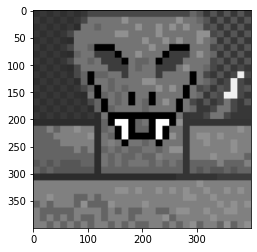

In [4]:
plt.imshow(img,'gray')

In [5]:
img.shape

(400, 400)

In [3]:
img = cv2.resize(img,(100,100))

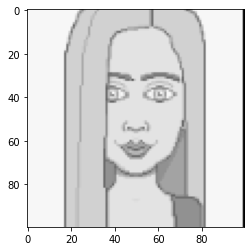

In [4]:
img2 = cv2.imread("network_img.png",0)
img2 = cv2.resize(img2,(100,100))
plt.imshow(img2,'gray')

## Suma de matrices

La primera operación consiste en una suma de matrices, cada elemento (pixel) de la nueva imagen será el resultado de sumar los elementos individuales de cada imagen.
$M_{ij} = \alpha \times{img_{ij}}+ (1-\alpha)\times{img2_{ij}}$

Alpha es el factor que permitirá ir de una imagen a otra suavemente.

In [13]:
alpha = 0.1
M = alpha*img + (1-alpha)*img2

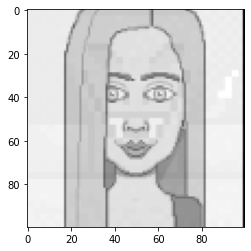

In [14]:
plt.imshow(M,'gray')

Puede verse cómo ambas imágenes aparecen con cierta transparencia. Esto es porque tomamos sólo parte del valor original.

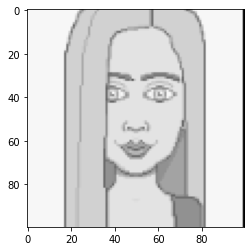

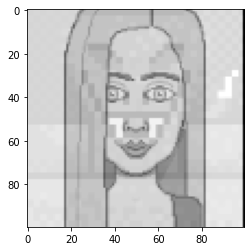

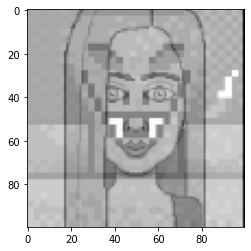

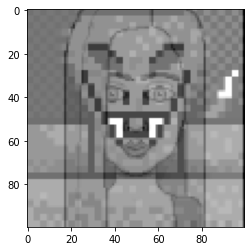

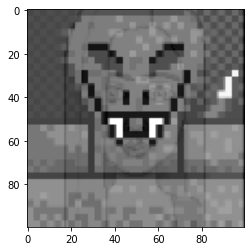

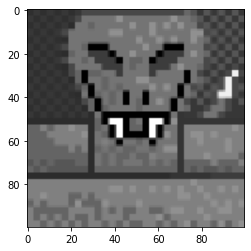

In [16]:
for i in range(0,101,20):
    alpha = i/100
    M = alpha*img + (1-alpha)*img2
    plt.imshow(M,'gray')    
    plt.show()

## Multiplicación de matrices

El caso base es el producto punto de dos vectores. Consiste en multiplicar los componentes de los vectores de forma individual y luego sumarlos para obtener un valor escalar.

In [4]:
vector1 = np.array([1,2,3])
vector2 = np.array([3,2,1])

producto = vector1 * vector2
producto

array([3, 4, 3])

In [6]:
producto_punto = producto.sum()
producto_punto

10

Para esto ya existe un módulo de numpy, pero de todas formas lo dejo escrito.

In [7]:
np.dot(vector1,vector2)

10

La multiplicación de matrices consiste en una generalización, vamos a realizar un producto punto entre filas y columnas para formar una nueva matriz.

In [17]:
matriz1 = np.array([[1,2,3],[1,2,3]])
matriz1

array([[1, 2, 3],
       [1, 2, 3]])

In [18]:
matriz2 = np.array([[3,3],[2,2],[1,1]])
matriz2

array([[3, 3],
       [2, 2],
       [1, 1]])

In [20]:
np.dot(matriz1,matriz2)

array([[10, 10],
       [10, 10]])

El producto punto tiene una relación con la covarianza, así que podemos decir que esta operación es una forma de medir qué tan parecidos son dos vectores.

In [21]:
#dos vectores apuntando en sentido opuesto
vector1 = np.array([1,2])
vector2 = np.array([-1,-2])
np.dot(vector1,vector2)

-5

In [27]:
#dos vectores apuntando al mismo sentido
vector1 = np.array([1,2])
vector2 = np.array([1,2])
np.dot(vector1,vector2)

5

Cuando apunta en el sentido opuesto, el valor es el mismo en negativo, como si se tratase de una correlación negativa. Una variable afecta negativamente a la otra.

In [26]:
#Vectores perpendiculares
vector1 = np.array([0,2])
vector2 = np.array([2,0])
np.dot(vector1,vector2)

0

Un vector a noventa grados es lo más lejano que dos vectores pueden estar, si uno de los puntos pasa esos noventa grados, empieza la covarianza negativa, lo cual también implica relación.

### Imágenes
La multiplicación de una imagen por determinadas matrices produce efectos interesantes.

In [53]:
giro = np.transpose(img)

Primero voy a hacer una operación básica que es la matriz transpuesta

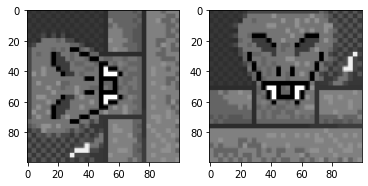

In [54]:
plt.subplot(1,2,1)
plt.imshow(giro,'gray')
plt.subplot(1,2,2)
plt.imshow(img,'gray')


Ahora voy a generar una matriz de permutación que permite mover los elementos de una matriz sin alterar sus cantidades, sólo los cambia de lugar. Para lograrlo necesitamos una matriz que sólo tenga un 1 por cada fila o columna.

In [67]:
m_permutacion = np.array([[1,0,0],[0,0,1],[0,1,0]])
m_permutacion

array([[1, 0, 0],
       [0, 0, 1],
       [0, 1, 0]])

Ahora generaré una matriz de permutación para producir una rotación sobre la imagen.

In [70]:
m_permutacion = np.zeros((100,100))
j = 99
for i in range(100):
    m_permutacion[i,j]=1
    j-=1

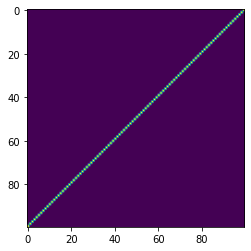

In [72]:
plt.imshow(m_permutacion)

In [73]:
rotacion = np.dot(img,m_permutacion)

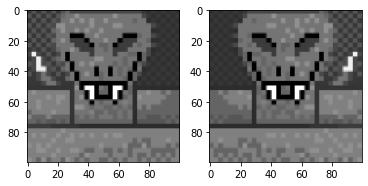

In [76]:
plt.subplot(1,2,1)
plt.imshow(rotacion,'gray')
plt.subplot(1,2,2)
plt.imshow(img,'gray')

Y ya que la multiplicación de matrices no es conmutativa, al cambiar el orden de la multiplicación obtenemos un resultado distinto.

In [77]:
rotacion = np.dot(m_permutacion,img)

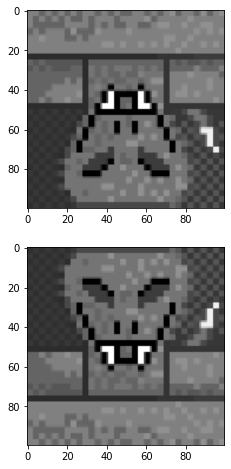

In [83]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.imshow(rotacion,'gray')
plt.subplot(2,1,2)
plt.imshow(img,'gray')

Obtuvimos dos reflejos, uno como si colocásemos el espejo a su lado, y otro al colocar el espejo arriba de la imagen.

### Matriz de permutación aleatoria

In [9]:
opciones = list(np.arange(0,100))

In [11]:
matriz_aleatoria = np.zeros((100,100))

In [12]:
for i in range(100):
    j = np.random.choice(opciones)
    opciones.pop(np.where(opciones==j)[0][0])
    matriz_aleatoria[i][j] = 1 

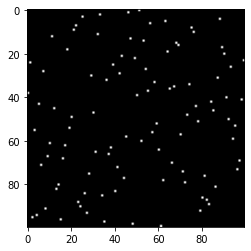

In [15]:
plt.imshow(matriz_aleatoria,'gray')

In [16]:
transformacion = np.dot(img2,matriz_aleatoria)

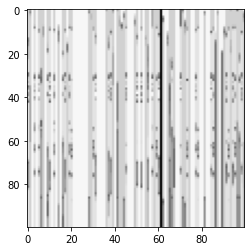

In [19]:
plt.imshow(transformacion,'gray')

Esta matriz de permutación mezcló las columnas, es como si hubiese sido cortada en cientos de pedazos verticales.

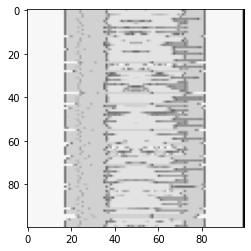

In [20]:
transformacion = np.dot(matriz_aleatoria,img2)
plt.imshow(transformacion,'gray')

Cambiar el orden de las matrices hace que se mezclen las filas y ya no las columnas, conocer esto puede permitirnos hacer transformaciones más planificadas.

### Experimentos

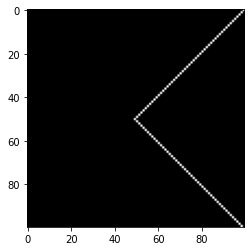

In [26]:
m_permutacion = np.zeros((100,100))
j = 99
for i in range(50):
    m_permutacion[i,j]=1
    j-=1
    
for i in range(50,100):
    m_permutacion[i,j]=1
    j+=1
    
plt.imshow(m_permutacion,'gray')

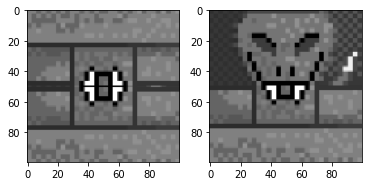

In [29]:
rotacion = np.dot(m_permutacion,img)
plt.subplot(1,2,1)
plt.imshow(rotacion,'gray')
plt.subplot(1,2,2)
plt.imshow(img,'gray')

El efecto fue el esperado, ya que me di cuenta de la capacidad de permutar por filas y columnas, esperaba que al hacer que la línea en la matriz de permutación llegase a cierto punto y luego regresase, eso produciese que los pixeles de la imagen se duplicasen como si hubiese sido atravesada por un espejo.

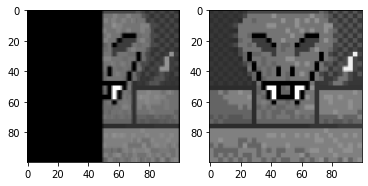

In [30]:
rotacion = np.dot(img,m_permutacion)
plt.subplot(1,2,1)
plt.imshow(rotacion,'gray')
plt.subplot(1,2,2)
plt.imshow(img,'gray')

Ahora, este resultado fue inesperado, pues parece que borró parte de la imagen, pero al fijarme bien en la intenisdad de los pixeles, lo que ocurre es que pintó ambas caras de la imagen en la misma zona. Como si hubiese doblado a la imagen a la mitad.  
Esto se percibe en las zonas más claras de la imagen original, se volvieron grises porque se plegaron con su contraparte oscura del otro lado de la imagen.

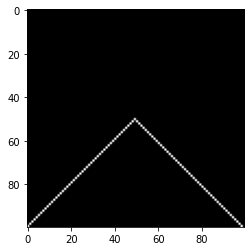

In [39]:
m_permutacion = np.zeros((100,100))
j = 0
for i in range(99,50,-1):
    m_permutacion[i,j]=1
    j+=1
    
for i in range(50,100):
    m_permutacion[i,j]=1
    j+=1
    
plt.imshow(m_permutacion,'gray')

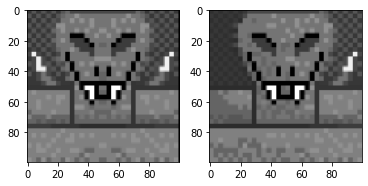

In [40]:
rotacion = np.dot(img,m_permutacion)
plt.subplot(1,2,1)
plt.imshow(rotacion,'gray')
plt.subplot(1,2,2)
plt.imshow(img,'gray')

Mi segunda intuición fue correcta, ya que la matriz anterior poní el espejo en sentido horizontal, supuse que cambiar la orientación del "triángulo" pondría el reflejo en una zona distinta.

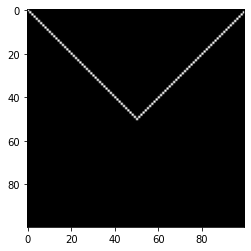

In [60]:
m_permutacion = np.zeros((100,100))
j = 0
for i in range(51):
    m_permutacion[i,j]=1
    j+=1
    
for i in range(49,0,-1):
    m_permutacion[i,j]=1
    j+=1
    
plt.imshow(m_permutacion,'gray')


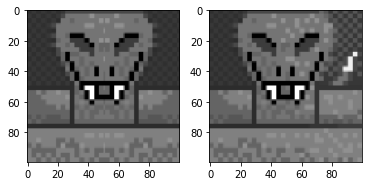

In [61]:
rotacion = np.dot(img,m_permutacion)
plt.subplot(1,2,1)
plt.imshow(rotacion,'gray')
plt.subplot(1,2,2)
plt.imshow(img,'gray')

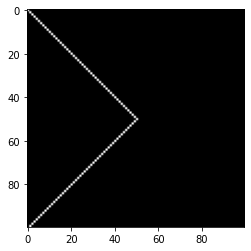

In [62]:
m_permutacion = np.transpose(m_permutacion)
plt.imshow(m_permutacion,'gray')

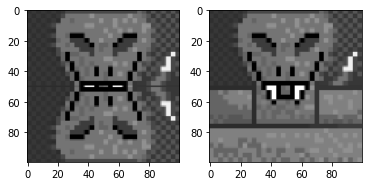

In [63]:
rotacion = np.dot(m_permutacion,img)
plt.subplot(1,2,1)
plt.imshow(rotacion,'gray')
plt.subplot(1,2,2)
plt.imshow(img,'gray')

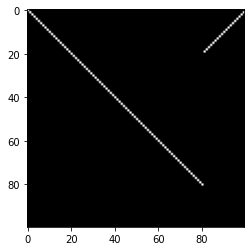

In [68]:
m_permutacion = np.zeros((100,100))
j = 0
for i in range(81):
    m_permutacion[i,j]=1
    j+=1
    
for i in range(19,0,-1):
    m_permutacion[i,j]=1
    j+=1
    
plt.imshow(m_permutacion,'gray')


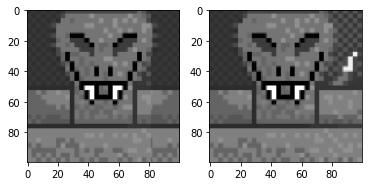

In [71]:
rotacion = np.dot(img,m_permutacion)
plt.subplot(1,2,1)
plt.imshow(rotacion,'gray')
plt.subplot(1,2,2)
plt.imshow(img,'gray')